In [1]:
import sys
sys.path.append('..')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

In [3]:
import CustomPipeline as cp
imputedHousingData=cp.clean('./data/Ames_Housing_Price_Data.csv')
imputedHousingData.to_csv("./data/Ames_Housing_Price_Data_Imputed.csv")
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [15]:
features=list(imputedHousingData.columns)
features.remove("PID")
features.remove("SalePrice")

X=imputedHousingData[features]
y=np.log(imputedHousingData['SalePrice'])
XTrain, XTest, ytrain, ytest = train_test_split(X, y)


In [16]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
XTrain, XTest, ytrain, ytest = train_test_split(X_std, y)

In [17]:
lasso=Lasso()
lasso=Lasso()
lasso.set_params(alpha=0.0001, max_iter=10000, normalize=True)
lasso.fit(XTrain,ytrain)
print(lasso.score(XTrain,ytrain))
lassoCoef = pd.Series(lasso.coef_, index=features)
sortedCoefs = np.abs(lassoCoef).sort_values(ascending=False)
features_to_keep_lasso=sortedCoefs[sortedCoefs!=0].index
features_to_keep_lasso

0.9232158906168022


Index(['GrLivArea', 'OverallQual', 'YearBuilt', 'OverallCond', 'BsmtFinSF1',
       'TotalBsmtSF', 'GarageCars', '1stFlrSF', 'ExterQual', 'YearRemodAdd',
       'MSZoning_C', 'LotArea', 'MSZoning_RM', 'Neighborhood_Crawfor',
       'BldgType_1Fam', 'Neighborhood_Somerst', 'BsmtExposure',
       'MSSubClass_30', 'BsmtQual', 'Fireplaces', 'Condition1_Norm',
       'GarageArea', 'Neighborhood_MeadowV', 'Neighborhood_NridgHt',
       'Functional', 'Foundation', 'PavedDrive', 'ScreenPorch', 'FireplaceQu',
       'BsmtFullBath', 'BldgType_Twnhs', 'MSSubClass_160',
       'Neighborhood_StoneBr', 'Exterior1st', 'MSSubClass_90',
       'Neighborhood_ClearCr', 'NewHome', 'LotFrontage', 'BsmtFinType1',
       'Neighborhood_Edwards', 'Neighborhood_NWAmes', 'MSZoning_RH',
       'BsmtFinSF2', 'GarageCond', 'GarageFinish', 'Condition1_Feedr',
       'RoofStyle', 'LotConfig_CulDSac', 'Condition1_PosN', 'BldgType_Duplex',
       'Condition1_Artery', 'KitchenAbvGr', 'HalfBath', 'GarageType',
       'Ne

In [9]:
alphas = np.linspace(0.000001,0.01,100)
params = [{'alpha': alphas}]
grid2=GridSearchCV(estimator=lasso,param_grid=params, return_train_score=True)
grid2.fit(XTrain,ytrain)
print(grid2.best_params_)
print(grid2.score(XTest,ytest))

{'alpha': 0.00010200000000000001}
0.8968481277437937


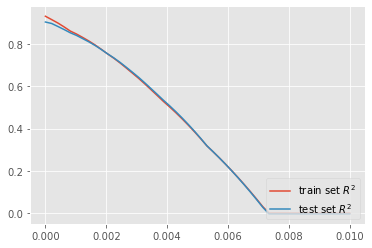

In [18]:
train_R2 = []
test_R2  = []
alphaRange = np.linspace(0.000001,0.01,50)
for alpha in alphaRange:
    lasso.set_params(alpha=alpha, max_iter=10000)  
    lasso.fit(XTrain, ytrain)
    train_R2.append(lasso.score(XTrain, ytrain))
    test_R2.append(lasso.score(XTest, ytest))
plt.plot(alphaRange, train_R2, label=r'train set $R^2$')
plt.plot(alphaRange, test_R2, label=r'test set $R^2$')
plt.legend(loc=4)

In [35]:
import statsmodels.api as sm
from statsmodels.api import OLS
features = sm.add_constant(XTrain)
ols_sm   = OLS(ytrain, features)
model    = ols_sm.fit()
model.pvalues[model.pvalues <0.05].index
pvalue_significant_features=model.pvalues[model.pvalues <0.05].index
pvalue_significant_features

Index(['const', 'GrLivArea', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'Exterior1st', 'Exterior2nd', 'ExterQual',
       'Foundation', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'TotalBsmtSF', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'BsmtFullBath',
       'BedroomAbvGr', 'TotRmsAbvGrd', 'Functional', 'GarageCars',
       'GarageQual', 'PavedDrive', 'EnclosedPorch', 'ScreenPorch',
       'MSSubClass_20', 'MSSubClass_30', 'MSSubClass_40', 'MSSubClass_45',
       'MSSubClass_50', 'MSSubClass_60', 'MSSubClass_70', 'MSSubClass_75',
       'MSSubClass_80', 'MSSubClass_85', 'MSSubClass_90', 'MSSubClass_120',
       'MSZoning_A', 'MSZoning_C', 'MSZoning_FV', 'MSZoning_I', 'MSZoning_RH',
       'MSZoning_RL', 'MSZoning_RM', 'Street_Grvl', 'Street_Pave',
       'LandContour_Low', 'LandContour_HLS', 'LandContour_Bnk',
       'LandContour_Lvl', 'LotConfig_Inside', 'LotConfig_Corner',
       'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3',
       'Co